# Analysis of effects of seq params on ChIP-seq

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import json
import os
import scipy.stats
from scipy.stats import gamma

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="./"
PDFDIR="pdfs"
TFCOLOR = "darkblue"
HMCOLOR = "darkred"

fdash = {
    "HM-paired": [7,0],
    "TF-paired": [7,0],
    "HM-single": [6,2],
    "TF-single": [6,2],
}

Populating the interactive namespace from numpy and matplotlib


## Read Number

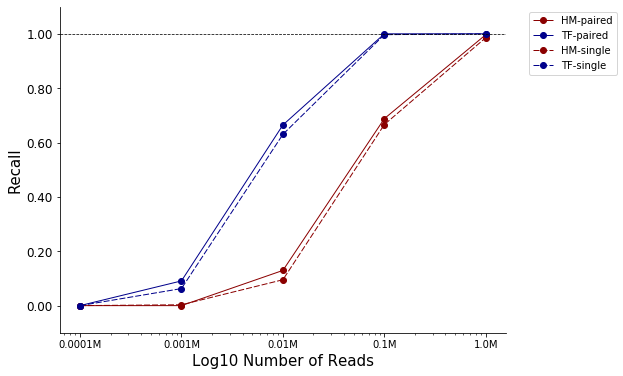

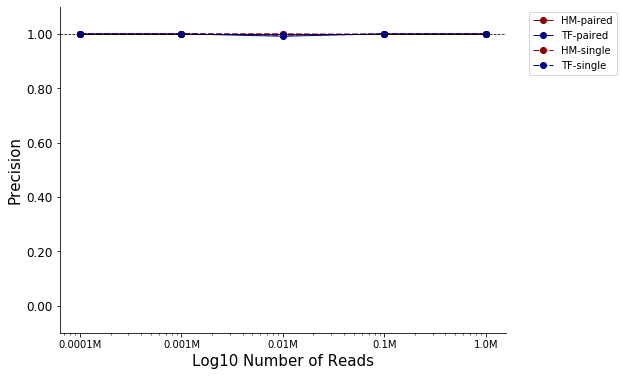

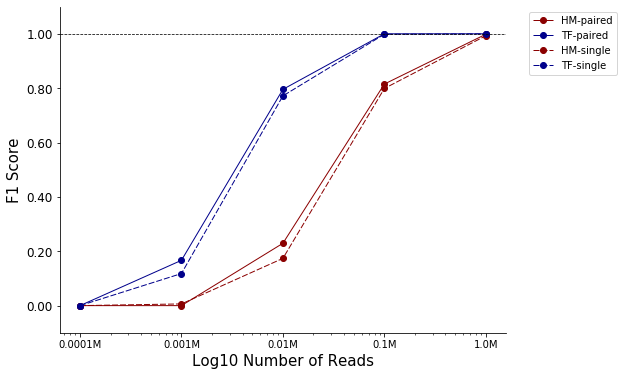

In [3]:
FMLDIR = DATADIR + "read-number/"


def readnum_plot(yvar, NA=0):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    for factor in fdash.keys():
        data = pd.read_csv(os.path.join(FMLDIR,"%s.summary_stats_readnum.tab"%factor), sep="\t")
        data.fillna(NA, inplace=True)
        data["narrow-F1"] = 2*(data['narrow-recall']*data["narrow-precision"])/(data["narrow-recall"] + data["narrow-precision"])
        data["broad-F1"] = 2*(data['broad-recall']*data["broad-precision"])/(data["broad-recall"] + data["broad-precision"])
        if factor.split('-')[0] == 'TF':
            ax.plot((data["numreads"]), data["narrow-%s"%yvar], linewidth=1, 
                     marker="o", color=TFCOLOR, label=factor, dashes=fdash[factor])
        else:
            ax.plot((data["numreads"]), data["broad-%s"%yvar], linewidth=1, 
                     marker="o", color=HMCOLOR, label=factor, dashes=fdash[factor])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)
    ax.set_ylim(bottom=-0.1, top=1.1)
    readnums = [100, 1000, 10000, 100000, 1000000]
    ax.set_xscale('log');
    ax.set_xticks(readnums)
    ax.set_xticklabels(["%sM"%(item/1000000) for item in readnums])
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
    ax.set_xlabel("Log10 Number of Reads", size=15)
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
    if yvar == "recall":
        ax.set_ylabel("Recall", size=15);
    elif yvar == "precision":
        ax.set_ylabel("Precision", size=15);
    else:
        ax.set_ylabel("F1 Score", size=15);
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    fig.savefig(os.path.join(PDFDIR, "Fig2a_readnum_%s_ParamsAnalysis.pdf"%yvar))
    
readnum_plot("recall")
readnum_plot("precision", NA=1.0)
readnum_plot("F1", NA=1.0)

## Read Length

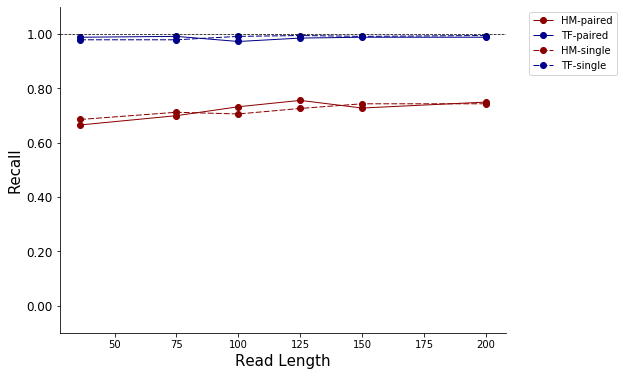

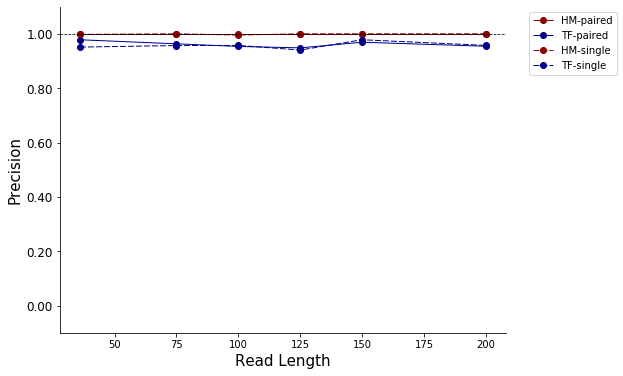

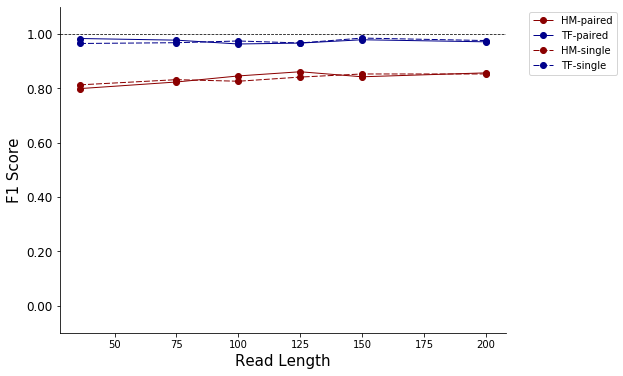

In [4]:
FMLDIR = DATADIR + "read-length/"


def readlen_plot(yvar, NA=0):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    for factor in fdash.keys():
        data = pd.read_csv(os.path.join(FMLDIR, "%s.summary_stats_readlen.tab"%factor), sep="\t")
        data.fillna(NA, inplace=True)
        data["narrow-F1"] = 2*(data['narrow-recall']*data["narrow-precision"])/(data["narrow-recall"] + data["narrow-precision"])
        data["broad-F1"] = 2*(data['broad-recall']*data["broad-precision"])/(data["broad-recall"] + data["broad-precision"])
        if factor.split('-')[0] == 'TF':
            ax.plot((data["readlen"]), data["narrow-%s"%yvar], linewidth=1, 
                     marker="o", color=TFCOLOR, label=factor, dashes=fdash[factor])
        else:
            ax.plot((data["readlen"]), data["broad-%s"%yvar], linewidth=1, 
                     marker="o", color=HMCOLOR, label=factor, dashes=fdash[factor])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)
    ax.set_ylim(bottom=-0.1, top=1.1)
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
    ax.set_xlabel("Read Length", size=15)

    if yvar == "recall":
        ax.set_ylabel("Recall", size=15);
    elif yvar == "precision":
        ax.set_ylabel("Precision", size=15);
    else:
        ax.set_ylabel("F1 Score", size=15);
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    fig.savefig(os.path.join(PDFDIR, "Fig2b_readlen_%s_ParamsAnalysis.pdf"%yvar))
    
readlen_plot("recall")
readlen_plot("precision", NA=1.0)
readlen_plot("F1", NA=1.0)

## PCR

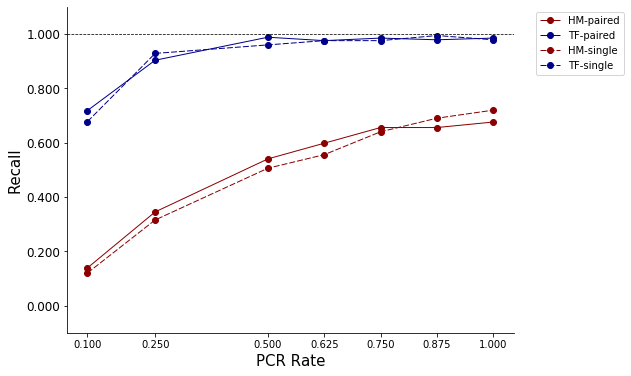

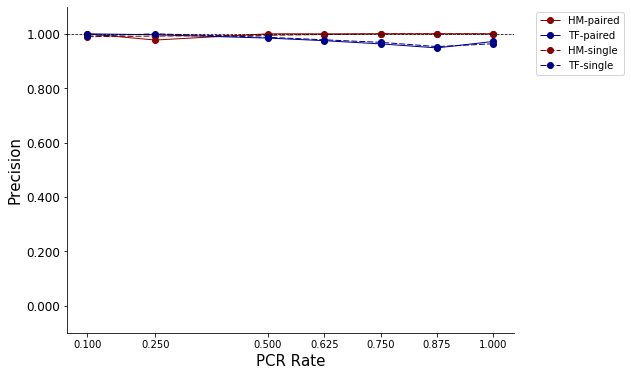

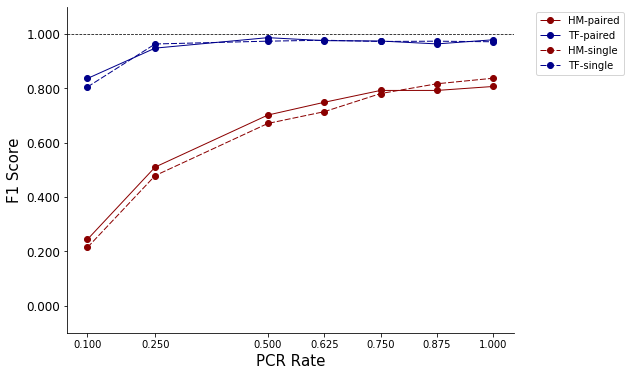

In [3]:
FMLDIR = DATADIR + "pcr/"


def pcr_plot(yvar, NA=0):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    for factor in fdash.keys():
        data = pd.read_csv(os.path.join(FMLDIR, "%s.summary_stats_pcr.tab"%factor), sep="\t")
        data.fillna(NA, inplace=True)
        data["narrow-F1"] = 2*(data['narrow-recall']*data["narrow-precision"])/(data["narrow-recall"] + data["narrow-precision"])
        data["broad-F1"] = 2*(data['broad-recall']*data["broad-precision"])/(data["broad-recall"] + data["broad-precision"])
        if factor.split('-')[0] == 'TF':
            ax.plot((data["pcr"]), data["narrow-%s"%yvar], linewidth=1, 
                     marker="o", color=TFCOLOR, label=factor, dashes=fdash[factor])
        else:
            ax.plot((data["pcr"]), data["broad-%s"%yvar], linewidth=1, 
                     marker="o", color=HMCOLOR, label=factor, dashes=fdash[factor])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)
    ax.set_ylim(bottom=-0.1, top=1.1)
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
    ax.set_xticks(data["pcr"])
    ax.set_yticklabels(["%0.3f"%item for item in ax.get_yticks()], size=12)
    ax.set_xlabel("PCR Rate", size=15)

    if yvar == "recall":
        ax.set_ylabel("Recall", size=15);
    elif yvar == "precision":
        ax.set_ylabel("Precision", size=15);
    else:
        ax.set_ylabel("F1 Score", size=15);
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    fig.savefig(os.path.join(PDFDIR, "Fig2c_PCR_%s_ParamsAnalysis.pdf"%yvar))
    
pcr_plot("recall")
pcr_plot("precision", NA=1.0)
pcr_plot("F1", NA=1.0)

## Fragment Mean Length

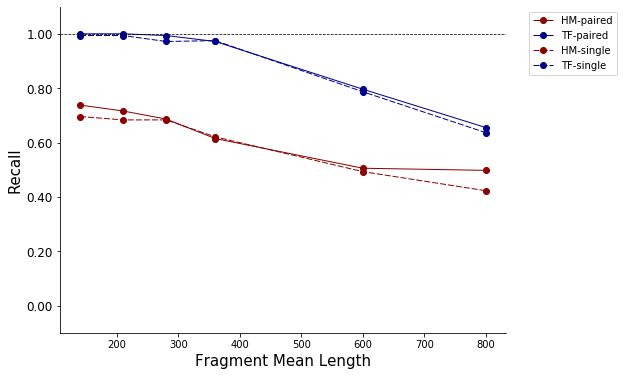

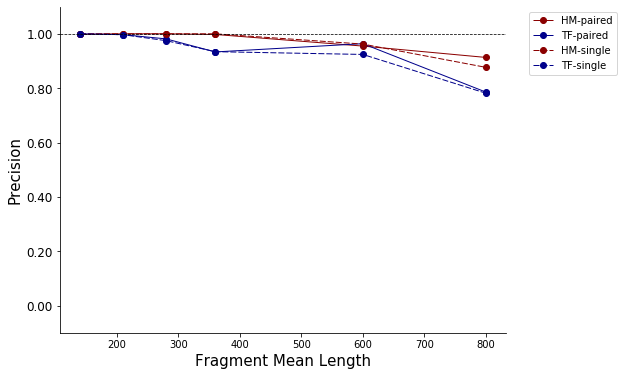

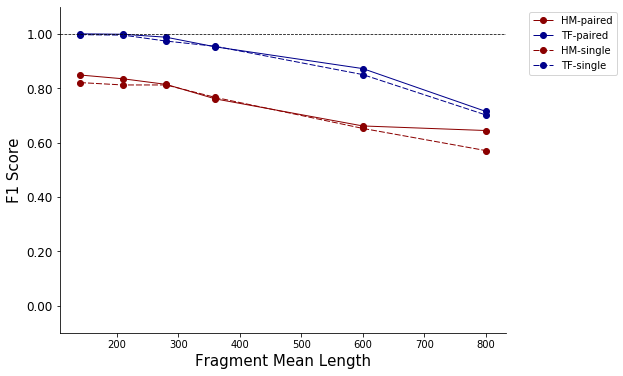

In [11]:
FMLDIR = DATADIR + "frag-mean-length/"

def fragmeanlen_plot(yvar, NA=0):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    for factor in fdash.keys():
        data = pd.read_csv(os.path.join(FMLDIR, "%s.summary_stats_fragmeanlen.tab"%factor), sep="\t")
        data["fragmeanlen"] = [float(x[0])*float(x[1]) for x in data["fragmeanlen"].str.split('_')]
        data.fillna(NA, inplace=True)
        data["narrow-F1"] = 2*(data['narrow-recall']*data["narrow-precision"])/(data["narrow-recall"] + data["narrow-precision"])
        data["broad-F1"] = 2*(data['broad-recall']*data["broad-precision"])/(data["broad-recall"] + data["broad-precision"])

        if factor.split('-')[0] == 'TF':
            ax.plot((data["fragmeanlen"]), data["narrow-%s"%yvar], linewidth=1, 
                     marker="o", color=TFCOLOR, label=factor, dashes=fdash[factor])
        else:
            ax.plot((data["fragmeanlen"]), data["broad-%s"%yvar], linewidth=1, 
                     marker="o", color=HMCOLOR, label=factor, dashes=fdash[factor])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)
    
    ax.set_xlabel("Fragment Mean Length", size=15)
    ax.set_ylim(bottom=-0.1, top=1.1)
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)

    if yvar == "recall":
        ax.set_ylabel("Recall", size=15);
    elif yvar == "precision":
        ax.set_ylabel("Precision", size=15);
    else:
        ax.set_ylabel("F1 Score", size=15);
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    fig.savefig(os.path.join(PDFDIR, "Fig2d_FRAGLEN_%s_ParamsAnalysis.pdf"%yvar))
    
fragmeanlen_plot("recall")
fragmeanlen_plot("precision", NA=1.0)
fragmeanlen_plot("F1", NA=1.0)

## Ability to recreate parameters from simulated data

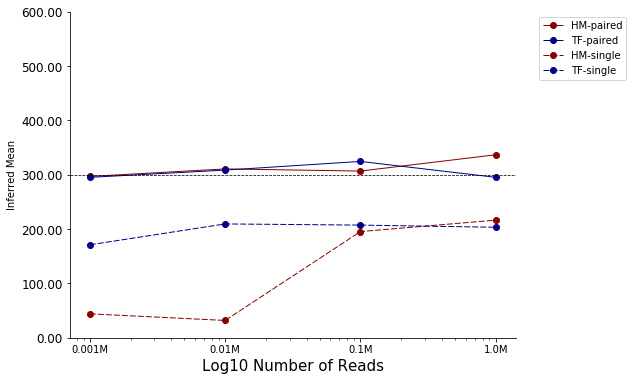

In [4]:
# path to parameters used for simulations
json_path = "/storage/mlamkin/workspace/chips/paper-analyses/workflows/fig2-params/"

# true parameters 
true_HM = json_path + "simplified_HM.json"
true_TF = json_path + "simplified_TF.json"
true_params = {}

# True parameter (k, theta) values
for true_json, jtype in zip([true_HM, true_TF], ["HM", "TF"]):
    with open(true_json) as f:
        hm_params = json.load(f)
        true_params[jtype] = np.array([hm_params["frag"]["k"], 
                                       hm_params["frag"]["theta"]])

FMLDIR = DATADIR + "read-number/"
readnums = [1000, 10000, 100000, 1000000]

fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
for factor in fdash.keys():
    inferred_means = []
    for i, readnum in enumerate(readnums):
        with open(FMLDIR + "params/" + factor + "_simlearn-numreads%i.json"%readnum) as f:
            data = json.load(f)
            k = data["frag"]["k"]
            theta = data["frag"]["theta"]
            inferred_means.append(k*theta)
        
    if factor.split('-')[0] == 'TF':
        ax.plot(readnums, inferred_means, linewidth=1, 
                 marker="o", color=TFCOLOR, label=factor, dashes=fdash[factor])
    else:
        ax.plot(readnums, inferred_means, linewidth=1, 
                 marker="o", color=HMCOLOR, label=factor, dashes=fdash[factor])
        
ax.axhline(y=true_params["TF"][0]*true_params["TF"][1], linestyle="dashed", color="black", linewidth=0.75)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim(bottom=-0.1, top=600)
ax.set_xscale('log');
ax.set_xticks(readnums)
ax.set_xticklabels(["%sM"%(item/1000000) for item in readnums])
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
ax.set_xlabel("Log10 Number of Reads", size=15)
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
ax.set_ylabel("Inferred Mean")

ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
#fig.savefig(os.path.join(PDFDIR, "Fig2a_readnum_%s_ParamsAnalysis.pdf"%yvar))

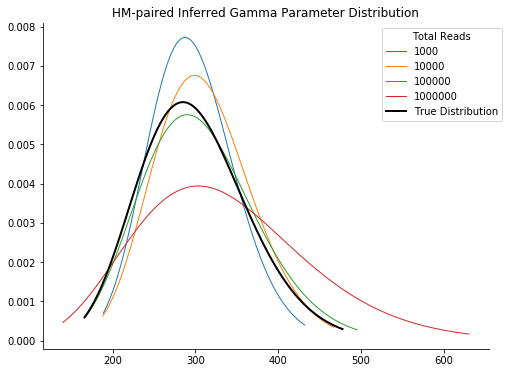

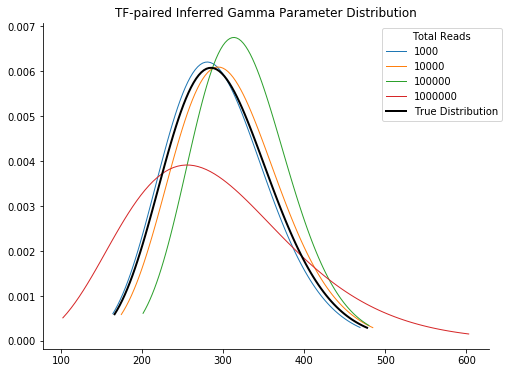

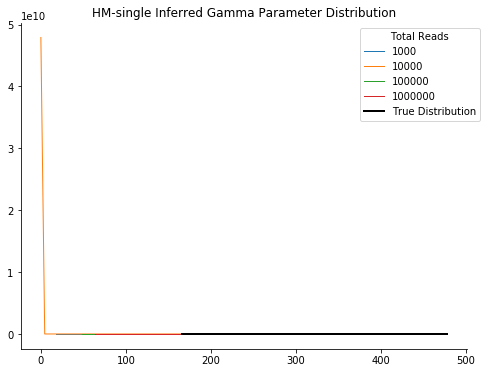

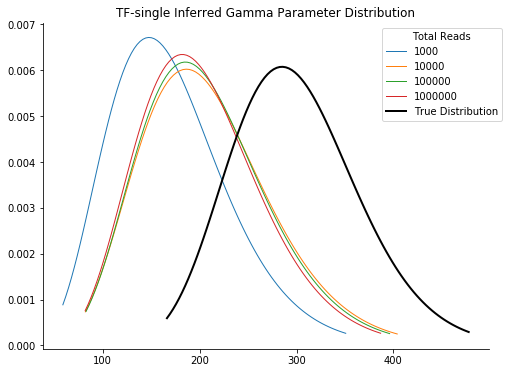

In [3]:
def inferred_dist(factor):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    inferred_means = []
    
    for i, readnum in enumerate(readnums):
        with open(FMLDIR + "params/" + factor + "_simlearn-numreads%i.json"%readnum) as f:
            data = json.load(f)
            k = data["frag"]["k"]
            theta = data["frag"]["theta"]

            x = np.linspace(gamma.ppf(0.01,k,scale=theta),
                            gamma.ppf(0.99,k,scale=theta),100)
            ax.plot(x, gamma.pdf(x,k,scale=theta), linewidth=1, label=readnum)

    # true parameters
    ftype = factor.split('-')[0]
    k = true_params[ftype][0]
    theta = true_params[ftype][1]
    x = np.linspace(gamma.ppf(0.01,k,scale=theta),
                gamma.ppf(0.99,k,scale=theta),100)
    ax.plot(x, gamma.pdf(x,k,scale=theta), linewidth=2, label="True Distribution", color="Black")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    #ax.set_ylim(bottom=0, top=0.008)
    ax.set_title("%s Inferred Gamma Parameter Distribution"%factor)
    #ax.set_xlabel("Log10 Number of Reads", size=15)
    #ax.set_ylabel("Inferred Mean")

    ax.legend(bbox_to_anchor=(1.04, 1), title="Total Reads", loc="upper right");
    #fig.savefig(os.path.join(PDFDIR, "Fig2a_readnum_%s_ParamsAnalysis.pdf"%yvar))
    return

for factor in fdash.keys():
    inferred_dist(factor)

In [15]:
for factor in fdash.keys():
    print(factor)
    for i, readnum in enumerate(readnums):
        params = np.zeros((2, 10))
        for j in range(1, 11):
            with open(FMLDIR + "params/" + factor + "-%i_simlearn-numreads%i.json"%(j,readnum)) as f:
                data = json.load(f)
                params[0,j-1] = data["frag"]["k"]
                params[1,j-1] = data["frag"]["theta"]
        print("\tRead Number %i"%(readnum))
        print("\t\tMean k %f, Var k %f"%(np.mean(params[0]), np.var(params[0])))
        print("\t\tMean theta %f, Var theta %f"%(np.mean(params[1]), np.var(params[1])))

HM-paired
	Read Number 1000
		Mean k 22.730738, Var k 26.635272
		Mean theta 13.826326, Var theta 10.917995
	Read Number 10000
		Mean k 23.970921, Var k 56.777218
		Mean theta 13.454262, Var theta 9.691929
	Read Number 100000
		Mean k 17.385985, Var k 90.011970
		Mean theta 25.233221, Var theta 177.352322
	Read Number 1000000
		Mean k 11.247579, Var k 9.212639
		Mean theta 31.723419, Var theta 56.631249
TF-paired
	Read Number 1000
		Mean k 20.139092, Var k 29.881022
		Mean theta 16.858748, Var theta 43.445525
	Read Number 10000
		Mean k 21.444125, Var k 16.533439
		Mean theta 15.188232, Var theta 9.457858
	Read Number 100000
		Mean k 18.364818, Var k 71.052838
		Mean theta 21.545447, Var theta 97.377791
	Read Number 1000000
		Mean k 10.765657, Var k 6.415931
		Mean theta 32.851182, Var theta 58.882116
HM-single
	Read Number 1000
		Mean k 21.891807, Var k 1043.550475
		Mean theta -21.753019, Var theta 14828.017814
	Read Number 10000
		Mean k 7.337044, Var k 36.412290
		Mean theta 42.191